In [4]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn import svm, metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X = X/255.0
X_scaled = scale(X)
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.7, random_state = 10)
print(X_train.shape)
print(X_test.shape)

(70000, 784)
(70000,)
(49000, 784)
(21000, 784)


Dimensionality Reduction w/ PCA (test)


In [ ]:
# X_train = PCA(n_components=100).fit_transform(X_train)

In [5]:
model = svm.SVC(kernel='rbf', C=10, gamma=0.001, decision_function_shape='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Accuracy:  0.972



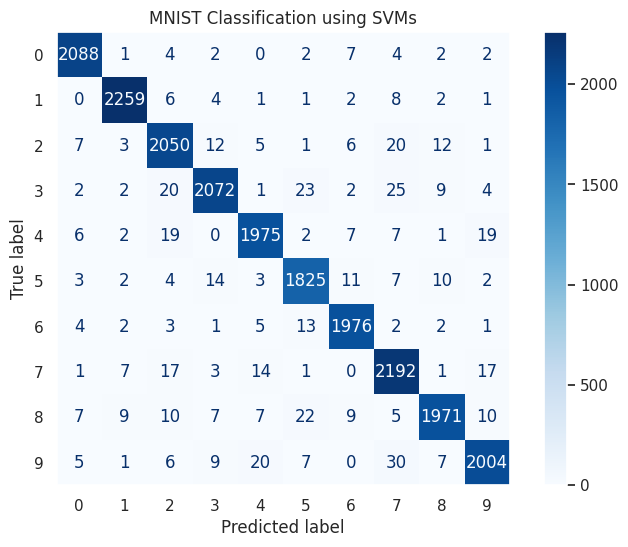

In [6]:
print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print()
sns.set(font_scale=1.0)
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12
cmat = metrics.confusion_matrix(y_test, predictions)
conf_mat = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=[0,1,2,3,4,5,6,7,8,9])
conf_mat = conf_mat.plot(include_values=True, cmap=plt.cm.Blues, ax=None, xticks_rotation='horizontal', values_format="")
conf_mat.ax_.set_title("MNIST Classification using SVMs")
plt.grid(False)
plt.show()
